<a href="https://colab.research.google.com/github/ludvikkrocak/Jellyfish_Classification/blob/main/jellyfish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import os
import zipfile
!pip install kaggle

In [9]:
os.environ['KAGGLE_USERNAME'] = 'ludvikkrocak'
os.environ['KAGGLE_KEY'] = 'bfd710bbd85c8a7b9dba4d52932bbd0f'

!mkdir jellyfish
%cd jellyfish
!kaggle datasets download -d anshtanwar/jellyfish-types

os.chdir('/content/jellyfish/jellyfish')


with zipfile.ZipFile('jellyfish-types.zip', 'r') as zip_ref:
    zip_ref.extractall()

/content/jellyfish/jellyfish/jellyfish
Dataset URL: https://www.kaggle.com/datasets/anshtanwar/jellyfish-types
License(s): Attribution 4.0 International (CC BY 4.0)
 78% 20.0M/25.5M [00:00<00:00, 204MB/s]
100% 25.5M/25.5M [00:00<00:00, 214MB/s]


In [10]:
print(os.listdir('.'))

['jellyfish-types.zip', 'jellyfish', 'compass_jellyfish', 'blue_jellyfish', 'Train_Test_Valid', 'mauve_stinger_jellyfish', 'barrel_jellyfish', 'lions_mane_jellyfish', 'Moon_jellyfish']


###file exploration

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

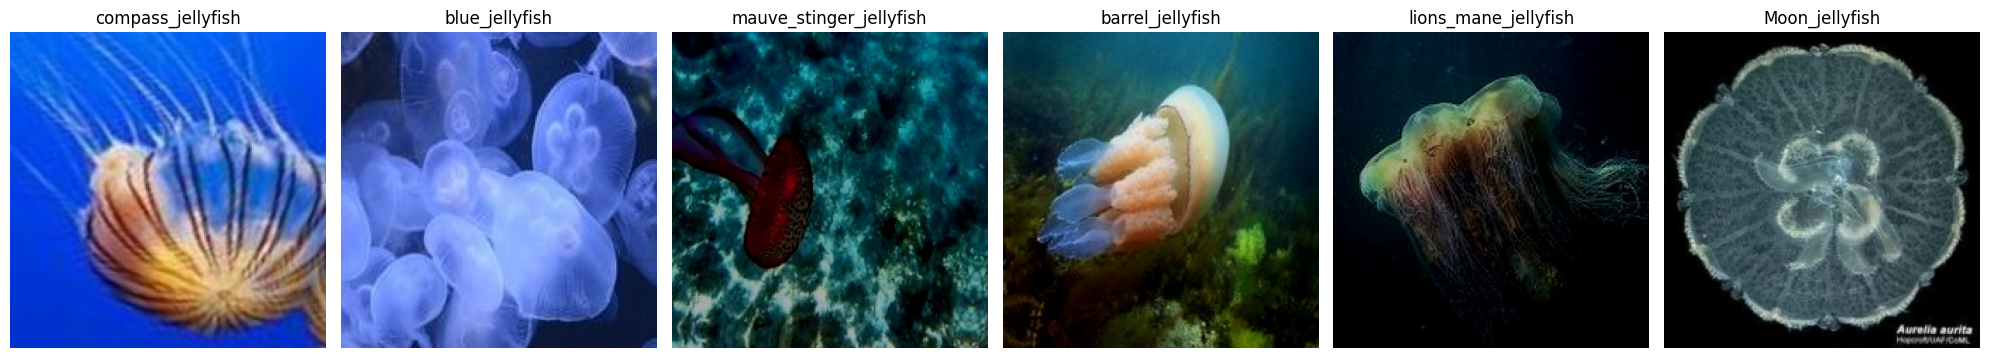

In [17]:
folders = [
    'compass_jellyfish',
    'blue_jellyfish',
    'mauve_stinger_jellyfish',
    'barrel_jellyfish',
    'lions_mane_jellyfish',
    'Moon_jellyfish'
]

# Vytvoř subplots
fig, axes = plt.subplots(1, len(folders), figsize=(20, 5))

# Zobraz jeden obrázek z každé složky
for ax, folder in zip(axes, folders):
    # Získá první obrázek ve složce
    img_path = os.path.join(folder, os.listdir(folder)[0])

    # Načti a zobraz obrázek
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(folder)
    ax.axis('off')  # Skryje osy

# Zobraz subplots
plt.tight_layout()
plt.show()

In [40]:
# Cesta k složkám s obrázky
base_path = '/content/jellyfish/jellyfish'

# Pro každou složku spočítat počet souborů
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    num_files = len(os.listdir(folder_path))
    print(f"Folder {folder} contains {num_files} images.")

Folder compass_jellyfish contains 150 images.
Folder blue_jellyfish contains 150 images.
Folder mauve_stinger_jellyfish contains 150 images.
Folder barrel_jellyfish contains 150 images.
Folder lions_mane_jellyfish contains 150 images.
Folder Moon_jellyfish contains 150 images.


In [27]:
#
train_path = '/content/jellyfish/jellyfish/Train_Test_Valid/Train'

# Získání seznamu všech podadresářů v trénovacím adresáři
train_folders = os.listdir(train_path)

# Pro každý podadresář vypíše počet souborů v něm
for folder in train_folders:
    folder_path = os.path.join(train_path, folder)
    if os.path.isdir(folder_path):  # Zkontroluje, zda je složka
        num_files = len(os.listdir(folder_path))
        print(f"{folder} contains {num_files} files")


compass_jellyfish contains 150 files
blue_jellyfish contains 150 files
mauve_stinger_jellyfish contains 150 files
barrel_jellyfish contains 150 files
lions_mane_jellyfish contains 150 files
Moon_jellyfish contains 150 files


In [23]:
valid_path = '/content/jellyfish/jellyfish/Train_Test_Valid/valid'

valid_folders = os.listdir(valid_path)
for folder in valid_folders:
    folder_path = os.path.join(valid_path, folder)
    if os.path.isdir(folder_path):
      num_files = len(os.listdir(folder_path))
      print(f"{folder} contains {num_files} files")

compass_jellyfish contains 7 files
blue_jellyfish contains 7 files
mauve_stinger_jellyfish contains 7 files
barrel_jellyfish contains 5 files
lions_mane_jellyfish contains 7 files
Moon_jellyfish contains 6 files


In [26]:
test_path = '/content/jellyfish/jellyfish/Train_Test_Valid/test'

test_folders = os.listdir(test_path)
for folder in test_folders:
    folder_path = os.path.join(test_path, folder)
    if os.path.isdir(folder_path):
      num_files = len(os.listdir(folder_path))
      print(f"{folder} contains {num_files} files")

compass_jellyfish contains 7 files
blue_jellyfish contains 7 files
mauve_stinger_jellyfish contains 7 files
barrel_jellyfish contains 5 files
lions_mane_jellyfish contains 8 files
Moon_jellyfish contains 6 files


### tensor flow preprocessing

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
# Vytvoř generátory pro načítání dat ze složek
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


### keras model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [35]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
28/28 [==============================] - 56s 2s/step - loss: 1.9176 - accuracy: 0.2304 - val_loss: 1.4121 - val_accuracy: 0.4062
Epoch 2/10
28/28 [==============================] - 47s 2s/step - loss: 1.3349 - accuracy: 0.4493 - val_loss: 1.3283 - val_accuracy: 0.3750
Epoch 3/10
28/28 [==============================] - 48s 2s/step - loss: 1.0550 - accuracy: 0.5922 - val_loss: 1.5329 - val_accuracy: 0.3125
Epoch 4/10
28/28 [==============================] - 45s 2s/step - loss: 0.8104 - accuracy: 0.6947 - val_loss: 1.1993 - val_accuracy: 0.5938
Epoch 5/10
28/28 [==============================] - 44s 2s/step - loss: 0.5538 - accuracy: 0.7926 - val_loss: 1.5499 - val_accuracy: 0.5000
Epoch 6/10
28/28 [==============================] - 44s 2s/step - loss: 0.3509 - accuracy: 0.8756 - val_loss: 1.9301 - val_accuracy: 0.5625
Epoch 7/10
28/28 [==============================] - 44s 2s/step - loss: 0.2046 - accuracy: 0.9447 - val_loss: 2.1052 - val_accuracy: 0.5625
Epoch 8/10
28/28 [==

In [38]:
# Vyhodnocení modelu na testovací sadě
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc}")

1/1 [==============================] - 0s 445ms/step - loss: 2.7842 - accuracy: 0.4688
Test accuracy: 0.46875


In [ ]:


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trénování modelu
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Vyhodnocení modelu na testovací sadě
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc}")

In [42]:
import os
import shutil

# Source and destination paths
base_path = '/content/jellyfish/jellyfish'
valid_path = '/content/jellyfish/jellyfish/Train_Test_Valid/valid'
test_path = '/content/jellyfish/jellyfish/Train_Test_Valid/test'

# List of folders
folders = [
    'compass_jellyfish',
    'blue_jellyfish',
    'mauve_stinger_jellyfish',
    'barrel_jellyfish',
    'lions_mane_jellyfish',
    'Moon_jellyfish'
]

# Move 10 images from each folder to validation and training datasets
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    files = os.listdir(folder_path)
    for i, file in enumerate(files):
        if i < 10:  # Move first 10 files to validation dataset
            shutil.move(os.path.join(folder_path, file), os.path.join(valid_path, folder))
        else:  # Move the rest of the files to training dataset
            shutil.move(os.path.join(folder_path, file), os.path.join(test_path, folder))


In [43]:
# Získání seznamu složek
paths = [base_path, valid_path, test_path]

# Pro každou cestu vypsat počet souborů
for path in paths:
    # Získání seznamu souborů v cestě
    files = os.listdir(path)
    # Výpočet počtu souborů
    num_files = sum([len(files) for _, _, files in os.walk(path)])
    # Výpis výsledku
    print(f"Path {path} contains {num_files} images.")


Path /content/jellyfish/jellyfish contains 1881 images.
Path /content/jellyfish/jellyfish/Train_Test_Valid/valid contains 109 images.
Path /content/jellyfish/jellyfish/Train_Test_Valid/test contains 870 images.
